In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import json
import plot_SNVM_data as pSd
from scipy.optimize import curve_fit

In [1]:
def exponential(t,A0,tau,t0,C):
    return A0*np.exp(-(t-t0)/tau)+C
def exponentialNot0(t,A0,tau,C):
    return A0*np.exp(-(t)/tau)+C
#def odrexp(B,t):
#    return B[0]*np.exp(-(t-B[2])/B[1])+B[3]
def odrexp(B,t):
    return B[0]*np.exp(-(t)/B[1])+B[2]
def twotopow(t,A0,tau,t0,C):
    return A0*np.power(2,(-(t-t0)/tau))+C
def tentopow(t,A0,tau,t0,C):
    return A0*np.power(10,(-(t-t0)/tau))+C
def fiftytopow(t,A0,tau,t0,C):
    return A0*np.power(50,(-(t-t0)/tau))+C
def logofexpNot0(t,A0,tau,C):
    return np.log(A0*np.exp(-(t)/tau)+C)
def logofexp(t,A0,tau,t0,C):
    return np.log(A0*np.exp(-(t-t0)/tau)+C)
def noCexp(t,A0,tau):
    return(A0*np.exp(-t/tau))
def gaussian_pdf(x,sigma,mu):
    return(1/(sigma*np.sqrt(2*np.pi))*np.exp((x-mu)**2/(2*sigma**2)))
def gaussian(x,x0,a,b):
    return(a*np.exp((x-x0)**2/(2*b**2)))
def poisson(x,lam,a,x0):
    return(a*np.power(lam,(x-x0))/scipy.special.factorial(x-x0)*np.exp(-lam))
def poissonNoFact(x,lam,a,x0):
    return(a*np.power(lam,(x-x0))*np.exp(-lam))

In [30]:
Glass65filepath = r'W:\SNVM\QS3\Measurement Data\Pulse Experiments\2024-09-12\relaxation_laser\2024-09-12-13-58-45-relaxation_laser'
Glass65file = h5py.File(Glass65filepath+r'\seq0\eval\relaxation.h5')
Glass65metadata = json.load(open(Glass65filepath + r'\imageMeta.json'))

OldData_offMol_filepath = r'C:\Users\jskolaut\Seafile\My Library\SNVM\20230922_QZabre_Visit_Garnets_SMMs_2DMag\230922_Visit_QZabre_DyCu5_CoCo4_FeF3_DyIG\Pulse experiments\2023-09-23\relaxation_laser\2023-09-23-15-11-32-relaxation_laser'
OldData_offMol_file = h5py.File(OldData_offMol_filepath+r'\seq0\eval\relaxation.h5')
OldData_offMol_metadata = json.load(open(OldData_offMol_filepath + r'\imageMeta.json'))


filepath = r'C:\Users\jskolaut\Seafile\My Library\SNVM\20230922_QZabre_Visit_Garnets_SMMs_2DMag\230922_Visit_QZabre_DyCu5_CoCo4_FeF3_DyIG\Pulse experiments\2023-09-22\relaxation_laser\2023-09-22-20-33-42-relaxation_laser'
file = h5py.File(filepath+r'\seq0\eval\relaxation.h5')
metadata = json.load(open(filepath + r'\imageMeta.json'))


filepath_reducedT1 = r'C:\Users\jskolaut\Seafile\My Library\SNVM\20230922_QZabre_Visit_Garnets_SMMs_2DMag\230922_Visit_QZabre_DyCu5_CoCo4_FeF3_DyIG\Pulse experiments\2023-09-22\relaxation_laser\2023-09-22-20-49-40-relaxation_laser'
file_reducedT1 = h5py.File(filepath_reducedT1+r'\seq0\eval\relaxation.h5')
metadata_reducedT1 = json.load(open(filepath_reducedT1 + r'\imageMeta.json'))


filepath_contact_Au = r'C:\Users\jskolaut\Seafile\My Library\SNVM\20230922_QZabre_Visit_Garnets_SMMs_2DMag\230922_Visit_QZabre_DyCu5_CoCo4_FeF3_DyIG\Pulse experiments\2023-09-23\relaxation_laser\2023-09-23-16-37-20-relaxation_laser'
file_contact_Au = h5py.File(filepath_contact_Au+r'\seq0\eval\relaxation.h5')
metadata_contact_Au = json.load(open(filepath_contact_Au + r'\imageMeta.json'))

files = [file,file_reducedT1]#,file_contact_Au]
labels = ['Retracted','AFM Feedback']
colors = ['C0', 'C1']


[1.29215665e-01 1.04501296e-04 8.61715741e-01]
[[ 2.90816062e-04  4.13033374e-07 -2.95418648e-04]
 [ 4.13033374e-07  6.67499567e-10 -4.28247775e-07]
 [-2.95418648e-04 -4.28247775e-07  3.02919545e-04]]
2.5836012986708935e-05
[1.17446414e-01 5.00912632e-05 8.75017147e-01]
[[ 2.15230008e-05  1.71799797e-08 -2.09915823e-05]
 [ 1.71799797e-08  2.50217051e-11 -1.93064797e-08]
 [-2.09915823e-05 -1.93064797e-08  2.19797183e-05]]
5.0021700342543704e-06


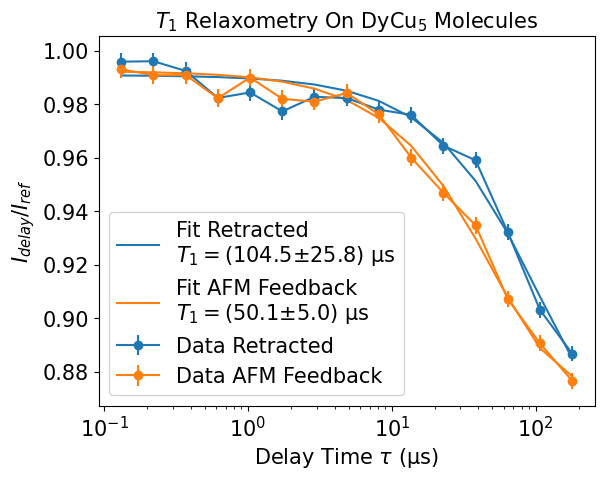

In [54]:

fig, ax = plt.subplots()

startindex = 5

for (index, h5file) in enumerate(files):

    delays = pSd.ExtractData(h5file, datatype = 'delay')[0][0]
    ms0s = pSd.ExtractData(h5file, datatype = 'ms0')[0][0]
    ref0s = pSd.ExtractData(h5file, datatype = 'ref0')[0][0]
    contrasts = pSd.ExtractData(h5file, datatype = 'contrastms0')[0][0]

    errors = ms0s / ref0s * np.sqrt(1/ms0s+1/ref0s)

    p0 = [1/8,1e2,0.9]
    lowerbounds = [-np.inf,0,-np.inf]
    upperbounds = [np.inf,np.inf,np.inf]
    try:
        popt, pcov = curve_fit(exponentialNot0,delays,contrasts, p0=p0,bounds=[lowerbounds,upperbounds], sigma = errors)
    except:
        print('error fitting')
        #popt=[0,0,0]

    print(popt)
    print(pcov)
    print(np.sqrt(pcov[1,1]))

    #ax.errorbar(delays[startindex:]*1e6, contrasts[startindex:], yerr = errors[startindex:], marker = 'o', label='Data ' + labels[index], color = colors[index])
    ax.errorbar(delays[startindex:]*1e6, ms0s[startindex:]/ref0s[startindex:], yerr = errors[startindex:], marker = 'o', label='Data ' + labels[index], color = colors[index])
    ax.plot(delays[startindex:]*1e6, exponentialNot0(delays[startindex:],*popt), '-', 
            label = 'Fit ' + labels[index] + '\n' r'$T_1 = ($' + str(np.round(popt[1]*1e6,1)) + r'$\pm$' + str(np.round(np.sqrt(pcov[1,1])*1e6,1)) + ') µs' , color = colors[index])#,label=r'Fit at ' + str(int(100*refamps[index])) + ' % ref. amp.')#ted $T_1$: ('+str(np.round(popt[1]*1e6,2))+r'$\pm$'+str(np.round(np.sqrt(np.diag(pcov))[1]*1e6,3))+') µs')
    

ax.set_xlabel(r'Delay Time $\tau$ (µs)')
ax.set_ylabel(r'${I_{delay}}/{I_{ref}}$')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
#plt.ylim(bottom=0.87)
#ax.set_yticks([])
ax.set_xscale('log')
ax.set_title(r'$T_1$ Relaxometry on DyCu$_5$ Molecules')
ax.legend()






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


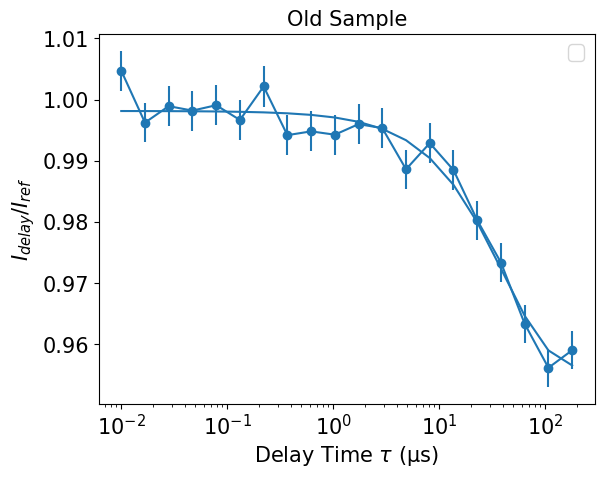

In [22]:
fig, ax = plt.subplots()

delays = pSd.ExtractData(OldData_offMol_file, datatype = 'delay')[0][0]
ms0s = pSd.ExtractData(OldData_offMol_file, datatype = 'ms0')[0][0]
ref0s = pSd.ExtractData(OldData_offMol_file, datatype = 'ref0')[0][0]
contrasts = pSd.ExtractData(OldData_offMol_file, datatype = 'contrastms0')[0][0]

errors = ms0s / ref0s * np.sqrt(1/ms0s+1/ref0s)

p0 = [1/8,1e2,0.9]
lowerbounds = [-np.inf,0,-np.inf]
upperbounds = [np.inf,np.inf,np.inf]
try:
    popt, pcov = curve_fit(exponentialNot0,delays,contrasts, p0=p0,bounds=[lowerbounds,upperbounds])
except:
    print('error fitting')
    #popt=[0,0,0]

ax.errorbar(delays[:]*1e6, ms0s[:]/ref0s[:], yerr = errors, marker = 'o')
ax.plot(delays[:]*1e6, exponentialNot0(delays[:],*popt), '-', color = 'C0')#,label=r'Fit at ' + str(int(100*refamps[index])) + ' % ref. amp.')#ted $T_1$: ('+str(np.round(popt[1]*1e6,2))+r'$\pm$'+str(np.round(np.sqrt(np.diag(pcov))[1]*1e6,3))+') µs')
    

ax.set_xlabel(r'Delay Time $\tau$ (µs)')
ax.set_ylabel(r'${I_{delay}}/{I_{ref}}$')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
#plt.ylim(bottom=0.87)
#ax.set_yticks([])
ax.set_xscale('log')
ax.set_title('Old Sample')
ax.legend()